# Arnoldi Iteration

In [4]:
import numpy as np
import numpy.linalg as la


Let us make a matrix with a defined set of eigenvalues and eigenvectors, given by `eigvals` and `eigvecs`.

In [5]:
np.random.seed(40)

# Generate matrix with eigenvalues 1...25
n = 25
eigvals = np.linspace(1., n, n)
eigvecs = np.random.randn(n, n)
print(eigvals)

A = la.solve(eigvecs, np.dot(np.diag(eigvals), eigvecs))
print(la.eig(A)[0])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]
[25. 24. 23.  1.  2.  3. 22.  4. 21. 20.  5.  6.  7. 19. 18.  8.  9. 17.
 16. 10. 11. 12. 15. 14. 13.]


## Initialization

Set up $Q$ and $H$:

In [6]:
Q = np.zeros((n, n))
H = np.zeros((n, n))

k = 0

Pick a starting vector, normalize it

In [7]:
x0 = np.random.randn(n)
x0 = x0/la.norm(x0)

# Poke it into the first column of Q
Q[:,0] = x0

del x0

Make a list to save arrays of Ritz values:

In [8]:
ritz_values = []

## Algorithm

Carry out one iteration of Arnoldi iteration.

Run this cell in-place (Ctrl-Enter) until H is filled.

3


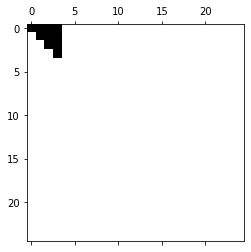

In [12]:
print(k)

u = A @ Q[:, k]

# Carry out Gram-Schmidt on u against Q
for i in range(k+1):
    H[i,k] = np.inner(Q[:,i],u)
    u -= H[i,k]*Q[:,i]

Q[:,k+1] = u

k += 1

pt.spy(H)

ritz_values.append(la.eig(H)[0])

Check that $Q^T A Q =H$:

In [14]:
la.norm(Q.T @ A @ Q - H)/ la.norm(A)

inf

Check that Q is orthogonal:

In [ ]:
la.norm(Q.T @ Q - np.eye(n))

## Plot convergence of Ritz values

Enable the Ritz value collection above to make this work.

In [ ]:
for i, rv in enumerate(ritz_values):
    pt.plot([i] * len(rv), rv, "x")